## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
%matplotlib inline

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [39]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [41]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [42]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [44]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [45]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# Assignment

In [48]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)


from keras.layers import Dropout
# import BatchNormalization
from keras.layers.normalization import BatchNormalization


model_assign = Sequential()

model_assign.add(Dense(332, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.042, seed=None)))
model_assign.add(BatchNormalization())
model_assign.add(Dropout(0.5))

model_assign.add(Dense(56, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.071, seed=None)) )
model_assign.add(BatchNormalization())
model_assign.add(Dropout(0.5))

model_assign.add(Dense(output_dim, activation='softmax'))


model_assign.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 332)               260620    
_________________________________________________________________
batch_normalization_11 (Batc (None, 332)               1328      
_________________________________________________________________
dropout_11 (Dropout)         (None, 332)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 56)                18648     
_________________________________________________________________
batch_normalization_12 (Batc (None, 56)                224       
_________________________________________________________________
dropout_12 (Dropout)         (None, 56)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                570       
Total para

In [49]:
model_assign.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_assign.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.5452 - acc: 0.8381 - val_loss: 0.1653 - val_acc: 0.9490
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.2592 - acc: 0.9250 - val_loss: 0.1235 - val_acc: 0.9626
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2047 - acc: 0.9413 - val_loss: 0.1064 - val_acc: 0.9673
Epoch 4/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1713 - acc: 0.9503 - val_loss: 0.0921 - val_acc: 0.9712
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1539 - acc: 0.9558 - val_loss: 0.0865 - val_acc: 0.9729
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1410 - acc: 0.9595 - val_loss: 0.0819 - val_acc: 0.9758
Epoch 7/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1304 - acc: 0.9616 - val_loss: 0.0796 - val_acc

Test score: 0.06606815920227091
Test accuracy: 0.9812


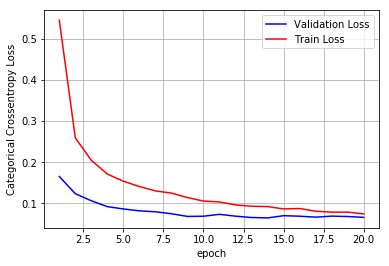

In [50]:
score = model_assign.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

3 Hidden layers

In [51]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)


from keras.layers import Dropout

model_assign3 = Sequential()

model_assign3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_assign3.add(BatchNormalization())
model_assign3.add(Dropout(0.5))

model_assign3.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.056, seed=None)))
model_assign3.add(BatchNormalization())
model_assign3.add(Dropout(0.5))

model_assign3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.10, seed=None)) )
model_assign3.add(BatchNormalization())
model_assign3.add(Dropout(0.5))

model_assign3.add(Dense(output_dim, activation='softmax'))


model_assign3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
__________

In [52]:
model_assign3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_assign3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.6582 - acc: 0.8005 - val_loss: 0.1684 - val_acc: 0.9460
Epoch 2/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2803 - acc: 0.9203 - val_loss: 0.1247 - val_acc: 0.9613
Epoch 3/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2149 - acc: 0.9399 - val_loss: 0.1083 - val_acc: 0.9669
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1845 - acc: 0.9487 - val_loss: 0.0929 - val_acc: 0.9711
Epoch 5/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1624 - acc: 0.9553 - val_loss: 0.0888 - val_acc: 0.9718
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1463 - acc: 0.9585 - val_loss: 0.0820 - val_acc: 0.9760
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1341 - acc: 0.9629 - val_loss: 0.0838 - val_acc

Test score: 0.06720245788121829
Test accuracy: 0.9813


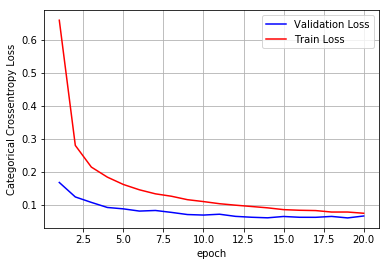

In [53]:
score = model_assign3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

5 hidden layers

In [54]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)


from keras.layers import Dropout

model_assign5 = Sequential()

model_assign5.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_assign5.add(BatchNormalization())
model_assign5.add(Dropout(0.5))

model_assign5.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)) )
model_assign5.add(BatchNormalization())
model_assign5.add(Dropout(0.5))

model_assign5.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)) )
model_assign5.add(BatchNormalization())
model_assign5.add(Dropout(0.5))

model_assign5.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.10, seed=None)) )
model_assign5.add(BatchNormalization())
model_assign5.add(Dropout(0.5))

model_assign5.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)) )
model_assign5.add(BatchNormalization())
model_assign5.add(Dropout(0.5))


model_assign5.add(Dense(output_dim, activation='softmax'))


model_assign5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
__________

In [55]:
model_assign5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_assign5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 1.2889 - acc: 0.5871 - val_loss: 0.2800 - val_acc: 0.9286
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.5212 - acc: 0.8593 - val_loss: 0.1755 - val_acc: 0.9521
Epoch 3/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.3722 - acc: 0.9079 - val_loss: 0.1519 - val_acc: 0.9609
Epoch 4/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.3107 - acc: 0.9253 - val_loss: 0.1302 - val_acc: 0.9677
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.2724 - acc: 0.9364 - val_loss: 0.1224 - val_acc: 0.9663
Epoch 6/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.2483 - acc: 0.9423 - val_loss: 0.1099 - val_acc: 0.9738
Epoch 7/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.2243 - acc: 0.9488 - val_loss: 0.1181 - val_ac

Test score: 0.08644420035893563
Test accuracy: 0.9796


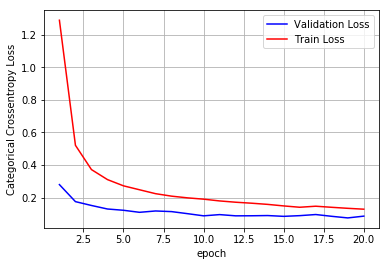

In [56]:
score = model_assign5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Without Dropout and BN

2 layers

In [57]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)


from keras.layers import Dropout

model_assign = Sequential()

model_assign.add(Dense(332, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.042, seed=None)))

model_assign.add(Dense(56, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.071, seed=None)) )

model_assign.add(Dense(output_dim, activation='softmax'))


model_assign.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 332)               260620    
_________________________________________________________________
dense_42 (Dense)             (None, 56)                18648     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                570       
Total params: 279,838
Trainable params: 279,838
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_assign.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_assign.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.2737 - acc: 0.9219 - val_loss: 0.1348 - val_acc: 0.9589
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.1079 - acc: 0.9680 - val_loss: 0.0925 - val_acc: 0.9705
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0686 - acc: 0.9786 - val_loss: 0.0763 - val_acc: 0.9774
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0489 - acc: 0.9850 - val_loss: 0.0731 - val_acc: 0.9782
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0376 - acc: 0.9880 - val_loss: 0.0758 - val_acc: 0.9771
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0268 - acc: 0.9921 - val_loss: 0.0680 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0215 - acc: 0.9934 - val_loss: 0.0743 - val_acc

Test score: 0.1037857443765759
Test accuracy: 0.9789


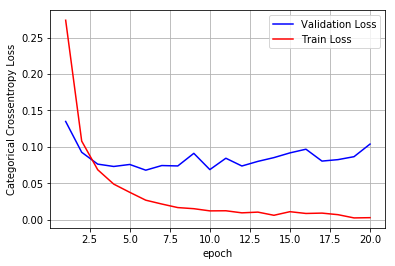

In [59]:
score = model_assign.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

3 Layers

In [60]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)


from keras.layers import Dropout

model_assign3 = Sequential()

model_assign3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_assign3.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.056, seed=None)))

model_assign3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.10, seed=None)) )

model_assign3.add(Dense(output_dim, activation='softmax'))


model_assign3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_45 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                650       
Total params: 476,490
Trainable params: 476,490
Non-trainable params: 0
_________________________________________________________________


In [61]:
model_assign3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_assign3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.2583 - acc: 0.9237 - val_loss: 0.1316 - val_acc: 0.9590
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0916 - acc: 0.9723 - val_loss: 0.0840 - val_acc: 0.9730
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0591 - acc: 0.9815 - val_loss: 0.0760 - val_acc: 0.9766
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0409 - acc: 0.9874 - val_loss: 0.0777 - val_acc: 0.9755
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0329 - acc: 0.9889 - val_loss: 0.0730 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0249 - acc: 0.9918 - val_loss: 0.0742 - val_acc: 0.9788
Epoch 7/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0208 - acc: 0.9930 - val_loss: 0.0672 - val_acc

Test score: 0.09172725084941308
Test accuracy: 0.9829


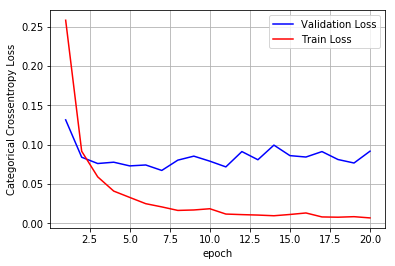

In [62]:
score = model_assign3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

5 Layers

In [63]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)


from keras.layers import Dropout

model_assign5 = Sequential()

model_assign5.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_assign5.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)) )

model_assign5.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)) )

model_assign5.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.10, seed=None)) )

model_assign5.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.144, seed=None)) )

model_assign5.add(Dense(output_dim, activation='softmax'))


model_assign5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_________________________________________________________________


In [64]:
model_assign5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_assign5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2572 - acc: 0.9217 - val_loss: 0.1074 - val_acc: 0.9669
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0914 - acc: 0.9713 - val_loss: 0.0969 - val_acc: 0.9664
Epoch 3/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0617 - acc: 0.9806 - val_loss: 0.0712 - val_acc: 0.9782
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0471 - acc: 0.9852 - val_loss: 0.0796 - val_acc: 0.9769
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0366 - acc: 0.9888 - val_loss: 0.0903 - val_acc: 0.9745
Epoch 6/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0332 - acc: 0.9895 - val_loss: 0.0828 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0274 - acc: 0.9916 - val_loss: 0.0801 - val_acc

Test score: 0.0904728904638242
Test accuracy: 0.9826


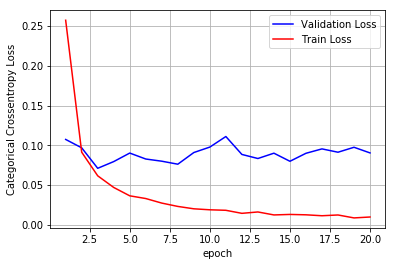

In [65]:
score = model_assign5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [2]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Model", "Training accuracy", "Test Accuracy", "val_loss"]

x.add_row(["MLP(BN+Relu+Dropout) 2 layer", 0.977, 0.98, 0.0661])
x.add_row(["MLP(BN+Relu+Dropout) 3 layer", 0.978, 0.98, 0.0672])
x.add_row(["MLP(BN+Relu+Dropout) 5 layer", 0.9703, 0.9796, 0.0864])
x.add_row(["MLP(Relu) 2 layer", 0.999, 0.97, 0.103])
x.add_row(["MLP(Relu) 3 layer", 0.998, 0.9829, 0.0917])
x.add_row(["MLP(Relu) 5 layer", 0.997, 0.98, 0.0905])                 
print(x)

+------------------------------+-------------------+---------------+----------+
|            Model             | Training accuracy | Test Accuracy | val_loss |
+------------------------------+-------------------+---------------+----------+
| MLP(BN+Relu+Dropout) 2 layer |       0.977       |      0.98     |  0.0661  |
| MLP(BN+Relu+Dropout) 3 layer |       0.978       |      0.98     |  0.0672  |
| MLP(BN+Relu+Dropout) 5 layer |       0.9703      |     0.9796    |  0.0864  |
|      MLP(Relu) 2 layer       |       0.999       |      0.97     |  0.103   |
|      MLP(Relu) 3 layer       |       0.998       |     0.9829    |  0.0917  |
|      MLP(Relu) 5 layer       |       0.997       |      0.98     |  0.0905  |
+------------------------------+-------------------+---------------+----------+
